In [2]:
import numpy as np
import hockey_env as h_env
import gym
from importlib import reload
import time

In [3]:
np.set_printoptions(suppress=True)

# Normal Game Play

In [9]:
reload(h_env)

Cannot re-register id: Hockey-v0


<module 'hockey_env' from '/home/georg/src/python/laser-hockey-env/hockey_env.py'>

In [10]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [11]:
obs = env.reset()
obs_agent2 = env.obs_agent_two()
env.render()

True

one episode with random agents

In [7]:
#obs = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render()
    a1 = np.random.uniform(-1,1,3)
    a2 = np.random.uniform(-1,1,3)    
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

Without rendering, it runs much faster

In [26]:
obs = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):    
    a1 = [1,-.5,0] # np.random.uniform(-1,1,3)
    a2 = [1,0.,0] # np.random.uniform(-1,1,3)*0    
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

"info" dict contains useful proxy rewards and winning information

In [27]:
info

{'winner': 0,
 'reward_closeness_to_puck': 0,
 'reward_touch_puck': 0.0,
 'reward_puck_direction': 0.0}

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

# Train Shooting

In [263]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [280]:
o = env.reset()
env.render()

True

In [281]:
for _ in range(200):
    env.render()
    a1 = [1,0,0] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0] 
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

# Train DEFENDING

In [38]:
reload(lh)

<module 'laser_hockey_env' from '/home/gmartius_local/projects/InfoRL/laser-hockey-rl/laserhockeyenv/laser_hockey_env.py'>

In [39]:
env = lh.LaserHockeyEnv(mode=lh.LaserHockeyEnv.TRAIN_DEFENSE)

In [40]:
o = env.reset()
env.render()

In [42]:
for _ in range(60):
    env.render()
    a1 = [1,0,0] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0] 
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

Player 2 scored


# Using discrete actions

In [ ]:
env = lh.LaserHockeyEnv(mode=lh.LaserHockeyEnv.TRAIN_SHOOTING)

In [ ]:
import random

In [ ]:
for _ in range(200):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0] 
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [243]:
env.close()

# Hand-crafted Opponent

In [252]:
reload(h_env)

Cannot re-register id: Hockey-v0


<module 'hockey_env' from '/home/georg/src/python/laser-hockey-env/hockey_env.py'>

In [253]:
env = h_env.HockeyEnv()

In [254]:
o = env.reset()
env.render()

True

In [255]:
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [256]:
obs_buffer = []

In [262]:
obs = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(500):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    obs_agent2 = env.obs_agent_two()
    if d: break

In [59]:
obs_buffer = np.asarray(obs_buffer)

In [60]:
np.mean(obs_buffer,axis=0)

array([-2.46823438,  0.12481995,  0.01314017,  0.99303848, -0.23188513,
        0.38560986, -0.00804078,  1.82346687, -0.14716781,  0.01053422,
        0.99426196, -0.55333737,  0.01959607, -0.00605729, -0.60969726,
        0.00765195,  1.24811836,  0.20854263])

In [27]:
np.std(obs_buffer,axis=0)

array([ 1.1493046 ,  0.50530025,  0.09808709,  0.00822017,  6.99315689,
        3.26768597,  1.40159138,  0.99988718,  0.64416343,  0.22625849,
        0.0961238 ,  7.72270112,  3.19218494,  2.78120454,  1.8795743 ,
        0.79278917, 12.34525226,  4.84355388])

In [28]:
scaling = [ 1.0,  1.0 , 3.14, 4.0, 4.0, 2.0,  
            1.0,  1.0,  3.14, 4.0, 4.0, 2.0,  
            2.0, 2.0, 10.0, 10.0]

In [30]:
import pylab as plt

In [36]:
obs_buffer[:,14]

array([-0.85213614, -0.85213614, -0.85213614, -0.85213614, -0.85213614,
       -0.85213614, -0.85213614, -0.85213614, -0.85213614, -0.85213614,
       -0.85213614, -0.51080751, -0.16981983,  0.17082644,  0.51113224,
        0.85109758,  1.19072294,  1.53000879,  1.86895561,  2.2075634 ,
        2.54583263,  2.88376331,  3.22135639,  3.55861187,  3.86799622,
        3.79772854,  0.95934153,  0.95934153,  0.95934153,  0.95934153,
        0.95934153,  0.95934153,  0.95934153,  0.95934153,  0.95934153,
        0.95934153,  0.95934153,  0.69899082,  0.43890047,  0.17907047,
       -0.08049965,  0.41269398,  0.80724907,  0.46024609,  0.18264389,
       -0.09468079, -0.37172842, -0.64849901, -0.92499256, -1.20120978,
       -1.47715068, -1.75281572, -2.0036602 , -2.24608493, -2.48826718,
       -2.7302072 , -2.97190523, -3.21336174, -3.45457649, -3.69555044,
       -3.73543739, -3.50696993, -3.27873087, -3.05072021, -2.82293725,
       -2.59538221, -2.36805487, -2.14095473, -1.91408181, -1.68

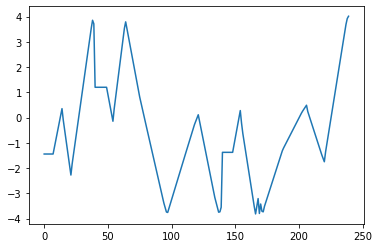

In [61]:
plt.plot(obs_buffer[:,14])

In [100]:
env.close()

# Human Opponent

In [101]:
reload(h_env)

Cannot re-register id: Hockey-v0


<module 'hockey_env' from '/home/georg/src/python/laser-hockey-env/hockey_env.py'>

In [102]:
env = h_env.HockeyEnv(keep_mode=True)

In [103]:
o = env.reset()
env.render()

True

In [104]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent(keep_mode=True)

Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [105]:
obs = env.reset()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(200):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

[-3.         -0.         -0.          1.         -0.         -0.
 -0.          3.         -0.         -0.          1.         -0.
 -0.         -0.          1.93011808 -0.16448498 -0.         -0.
  0.          0.        ]
[-2.96275997 -0.0001421  -0.00384638  0.9999926   1.86206889 -0.03062823
 -0.19231956  3.         -0.         -0.          1.         -0.
 -0.         -0.          1.93011808 -0.16448498 -0.         -0.
  0.          0.        ]
[-2.89200115 -0.00131416 -0.00377744  0.99999287  3.53793073 -0.05816719
  0.00344732  3.         -0.         -0.          1.         -0.
 -0.         -0.          1.93011808 -0.16448498 -0.         -0.
  0.          0.        ]
[-2.79107857 -0.00267553 -0.00617366  0.99998094  5.04620647 -0.082734
 -0.11981278  3.         -0.         -0.          1.         -0.
 -0.         -0.          1.93011808 -0.16448498 -0.         -0.
  0.          0.        ]
[-2.66300535 -0.00474977 -0.00631801  0.99998004  6.40365458 -0.10459062
 -0.00721742  3.     

[-1.13343239 -0.04650354  0.0467141   0.9989083  -8.26051331  0.09488116
 -0.0664864   1.42077637 -0.01093245 -0.09012763  0.99593022 -1.37843561
  0.00018313 -0.26836684  1.38923049 -0.18539762 16.78316116 -1.09969199
  0.          0.        ]
[ -1.31936121  -0.04457521   0.04633073   0.99892616  -9.29653072
   0.09405233  -0.01918905   1.40853381  -0.01529408  -0.12833276
   0.99173117  -0.63782132   0.01569278  -1.92187786   1.04726291
  -0.22481728 -17.09838104  -1.97098172  15.           0.        ]
[-1.44946384 -0.04543781  0.04748963  0.99887173 -6.50480843 -0.03602432
  0.05800868  1.40311146 -0.01852703 -0.16443416  0.98638806 -0.57403916
  0.0141235  -1.84500277  1.09218001 -0.06566286 -0.63718259  0.01567742
 14.          0.        ]
opp shoot
[ -1.52933979  -0.04677343   0.05261219   0.99861502  -3.99225855
  -0.03544594   0.25644976   1.39356709  -0.0225358   -0.19926555
   0.97994553  -0.51663524   0.01271115  -1.77120256   0.79291821
   0.01022053 -30.50965118   1.437373

opp shoot
[ -0.7918644   -0.01838303   0.0800043    0.99679452   5.52290058
   0.02137875   0.04426257   0.73948288  -0.05173683  -0.67419323
   0.738555    -0.34313929   0.08254289  -0.37886283   0.26112795
  -0.01325464 -24.22977066   1.97229612   7.           0.        ]
opp shoot
[ -0.66906357  -0.01646852   0.07397941   0.99725977   6.13718939
   0.05886796  -0.30214205   0.73390913  -0.05090618  -0.67954771
   0.73363132  -0.30882534   0.0742886   -0.36370832   0.25553131
  -0.01201391 -24.19758034   1.98613763   6.           0.        ]
opp shoot
[ -0.53764915  -0.01464605   0.07346861   0.99729753   6.57050705
   0.08800557  -0.02560944   0.72893286  -0.05019379  -0.68465421
   0.72886804  -0.27794281   0.06685974  -0.34915999   0.25028324
  -0.01420736 -24.18129539   1.8349365    5.           0.        ]
opp shoot
[ -0.40098333  -0.01251936   0.07344802   0.99729905   6.83325529
   0.1062086   -0.00103263   0.7244935   -0.0495863   -0.68952501
   0.72426187  -0.2501485    0.06

[-3.20598507 -0.03719902 -0.05506065  0.99848301 -2.61069369 -0.13959233
 -0.16045032  1.27015328 -0.04859257 -0.76585469  0.64301369  2.98061895
  0.00283426 -0.10260329 -2.76585865  0.00484943 20.95365334  1.26801085
  0.         15.        ]
opp shoot
[-3.27442074 -0.04064703 -0.05416141  0.99853219 -3.42213964 -0.16688944
  0.04502916  1.32398915 -0.04869652 -0.76711993  0.64150371  2.68255711
  0.00255083 -0.09849916 -2.82949257 -0.01172113 18.82462311  1.27388322
  0.          0.        ]
opp shoot
[-3.29877472 -0.04355955 -0.05366889  0.99855879 -1.21785676 -0.14263174
  0.02466181  1.37245274 -0.04879856 -0.76833177  0.64005179  2.4143014
  0.00229575 -0.09455919 -3.00759411 -0.01733637 -8.90507507 -0.28076705
  0.          0.        ]
[-3.31712532 -0.04732561 -0.04627281  0.99892884 -0.91981351 -0.14303097
  0.37026715  1.41608119 -0.04889965 -0.76949255  0.63865579  2.17287111
  0.00206617 -0.09077682 -2.86972141 -0.00270176  6.89364672  0.7317341
  0.         15.        ]
op

[-2.71906471 -0.07845831 -0.0221114   0.99975551  0.86415929  0.0043566
  0.27751073  1.795259   -0.05094051 -0.7890906   0.61427683  0.0828994
  0.00007883 -0.02560842 -2.28291607 -0.06413221 -1.70919096 -0.05954698
  0.          0.        ]
[-2.69164181 -0.07965851 -0.01130649  0.99993608  1.37001956  0.00610469
  0.54032314  1.79679871 -0.05097628 -0.78939253  0.61388878  0.07460946
  0.00007095 -0.02458408 -2.31706572 -0.06532192 -1.70748174 -0.05948744
  0.          0.        ]
[-2.65627861 -0.07990265 -0.00804615  0.99996763  1.7679677   0.00774857
  0.1630251   1.79818726 -0.05101061 -0.78968221  0.61351611  0.06714851
  0.00006385 -0.02360072 -2.35118103 -0.06651068 -1.70577431 -0.05942795
  0.          0.        ]
[-2.61761761 -0.08067465 -0.00028982  0.99999996  1.93285823  0.00886565
  0.38782093  1.79943991 -0.05104303 -0.78996012  0.61315823  0.06043366
  0.00005747 -0.02265669 -2.24078989 -0.06740141  5.51956701 -0.0445476
  0.         15.        ]
[-2.60440969 -0.0801506

opp shoot
[ -2.08025217  -0.0313549    0.02640262   0.99965139   7.45930624
   0.21148938   0.08496062   1.82765841   0.00691485  -0.59608551
   0.80292096   0.08443178   0.06574593   0.91662419   1.34897089
   0.01683784 -23.91762543   0.65133595   4.           0.        ]
opp shoot
[ -1.90873909  -0.02635479   0.02491575   0.99968955   8.57544422
   0.24090908  -0.07436819   1.82790947   0.00983882  -0.58186319
   0.81328668   0.07598861   0.05917134   0.87995923   1.34917665
   0.02064013 -23.92408752   0.68625969   3.           0.        ]
opp shoot
[ -1.71711588  -0.01981926   0.01517717   0.99988482   9.57996845
   0.26720497  -0.48702878   1.82808852   0.01259542  -0.56804013
   0.82300086   0.06838974   0.05325421   0.84476084   1.34927416
   0.02274513 -23.93176079   0.64531505   2.           0.        ]
opp shoot
[ -1.50743246  -0.01395702   0.01389605   0.99990345  10.48404026
   0.2852602   -0.06406283   1.82820535   0.0151968   -0.55461744
   0.83210546   0.06155077   0.04

[-3.30915165 -0.32273006  0.00926909  0.99995704 -0.72098315  0.2464294
 -0.01269895  1.82434392  0.05305123 -0.31247028  0.94992754  0.00289912
  0.00225751  0.24823922  0.55871391 -2.1445241  13.2792263  -1.50537002
  0.          0.        ]
[-3.32568169 -0.31705093  0.00892933  0.99996013 -0.82657117  0.281881
 -0.01698866  1.82421517  0.05364633 -0.30793921  0.95140604  0.00260921
  0.00203175  0.23830965  0.82403278 -2.17460155 13.26594734 -1.50386465
  0.          0.        ]
[-3.34380627 -0.31074476  0.00851073  0.99996378 -0.90621036  0.31272995
 -0.02093091  1.82409096  0.05421591 -0.30358279  0.95280506  0.00234829
  0.00182858  0.22877726  1.08908653 -2.20464897 13.25268173 -1.50236082
  0.          0.        ]
[-3.36302662 -0.30395174  0.0084541   0.99996426 -0.96101099  0.33931977
 -0.00283151  1.82397127  0.05476141 -0.29939465  0.95412937  0.00211346
  0.00164572  0.21962616  1.35387516 -2.23466635 13.23942947 -1.50085843
  0.          0.        ]


In [37]:
env.puck.position

b2Vec2(2,4)